Ejercicio de EDA para dataset relacionados al registro detallado de prestamos

In [22]:
''' Se cargan diversos paquete para EDA'''

import numpy as np # algebra lineal
import pandas as pd # procesamiento de datos tabulares, leer CSV
import matplotlib.pyplot as plt # visulaizacion de datos
import seaborn as sns # visualizacion de datos
from scipy import stats # estadistica
from sklearn.cluster import DBSCAN # valores a tipicos
from collections import Counter
from fancyimpute import KNN # imputacion de vecinos mas proximos

import os

''' Datasets a utilizar '''
print(os.listdir(r"../EDA Creditos"))

['EDA creditos.ipynb', 'test_AV3.csv', 'test_data.csv', 'train_AV3.csv', 'train_data.csv', 'train_prediction.csv']


Importar los datasets desde archivos CSV

In [25]:
test_df = pd.read_csv("test_AV3.csv")
train_df = pd.read_csv("train_AV3.csv")

In [27]:
''' Estructura de los datos'''
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [30]:
''' Forma de los datos '''
train_df.shape

(614, 13)

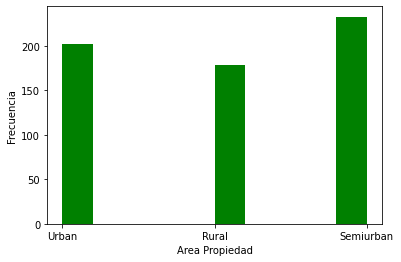

In [33]:
''' Histograma de acuerdo a Property Area '''
plt.hist(train_df["Property_Area"], color="green")
plt.xlabel("Area Propiedad")
plt.ylabel("Frecuencia")
plt.show()

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object